# Summer Challenge
### Team: LowHangingFruit

Programs: Python2 & R 

Purpose: Prep file for merging datasets and formating variables

In [1]:
# Loading rpy2 package to Jupyter magic system
# Note: ryp2 is difficult to install on windows, 
# virtual box might be a better alternative if that is your platform
%load_ext rpy2.ipython
# Filter dpyr warnings
import warnings
warnings.filterwarnings('ignore')

You can use `%lsmagic` to list the availible one line `%` and cell `%%` magic commands. After running `%load_ext rpy2.ipython`, this list should include `%R`. To read the help documentation on the magic system for Jupyter Notebooks, run the `%magic` command.

In [2]:
%lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%debug 

In [3]:
import openpyxl as px
import numpy as np
import pandas as pd

In [4]:
AD = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Analytics Dataset', index_col = 'ID Number')
ADkeys = set(AD.index.values)
MemLev = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Mbrshp Level', index_col = 'ID Number')
MLkeys = set(MemLev.index.values)
PayMeth = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Pmt Mthd', index_col = 'ID Number')
PMkeys = set(PayMeth.index.values)
SaleChan = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Sales Channel', index_col = 'ID Number')
SCkeys = set(SaleChan.index.values)
Off1stRN = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Offer on 1st Ren Notice', index_col = 'ID Number')
O1RNkeys = set(Off1stRN.index.values)
EmInd = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Email Indicators', index_col = 'ID Number')
EIkeys = set(EmInd.index.values)
EmOpt = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='EMail Options', index_col = 'ID Number')
EOkeys = set(EmOpt.index.values)
Demo1 = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Demo_1', index_col = 'ID Number')
D1keys = set(Demo1.index.values)
ZipCode = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Zip Code', index_col = 'ID Number')
ZCkeys = set(ZipCode.index.values)
KeyPeople = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Key people on Membership', index_col = 'ID Number')
KPkeys = set(KeyPeople.index.values)
NumVisits = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Num Visits', index_col = 'ID Number')
NVkeys = set(NumVisits.index.values)
CSIs = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='CSIs', index_col = 'ID Number')
CSkeys = set(CSIs.index.values)
Comm = pd.read_excel(open('SMM Competitor Workbook 5.25.16.xlsx','rb'), 
                       sheetname='Communication', index_col = 'ID Number')
Comkeys = set(Comm.index.values)

In [5]:
#Check keys
keySet = [MLkeys, PMkeys, SCkeys,O1RNkeys,EIkeys,EOkeys,D1keys,ZCkeys,KPkeys,
              NVkeys,CSkeys,Comkeys]
for kS in keySet:
    print "New keys: ", [k for k in kS if k not in ADkeys]

New keys:  []
New keys:  [6993112]
New keys:  [6993112]
New keys:  [6993112]
New keys:  []
New keys:  []
New keys:  []
New keys:  []
New keys:  []
New keys:  [6993112]
New keys:  [6871452]
New keys:  [u'Grand Total', 6993112]


# Missing members

There are two member ID numbers in the auxiliary data sheets which do not appear in the Analytics Dataet sheet.
1. 6993112
1. 6871452

Also, the Communication sheet has a row labeled 'Grand Total' which should be removed


In [6]:
Comm.drop('Grand Total',inplace=True)

In [7]:
Comkeys = set(Comm.index.values)
print "New keys: ", [k for k in Comkeys if k not in ADkeys]

New keys:  [6993112]


# Merging sheets


In [8]:
badIDs = [6871452,6993112]
demos = ['Demo1_B', 'Demo1_C', 'Demo1_D','Demo1_E', 'Demo1_F', 'Demo1_G',
         'Demo1_H', 'Demo1_I', 'Demo1_J','Demo1_K', 'Demo1_L', 'Demo1_M']
#Add new columns to AD

for id,row in AD.iterrows():
    if id in O1RNkeys and pd.notnull(Off1stRN.ix[id,'Offer on 1st Ren Notice']):
        AD.ix[id,'Offer on 1st Ren Notice'] = Off1stRN.ix[id,'Offer on 1st Ren Notice']
    for d in demos:
        if id in D1keys and pd.notnull(Demo1.ix[id,d]):
            AD.ix[id,d] = Demo1.ix[id,d]
    if id in ZCkeys and pd.notnull(ZipCode.ix[id,'Zip Code']):
        AD.ix[id,'Zip Code'] = ZipCode.ix[id,'Zip Code']
    if id in NVkeys and pd.notnull(NumVisits.ix[id,'Number of Visits']):
        AD.ix[id,'Number of Visits'] = NumVisits.ix[id,'Number of Visits']

In [9]:
#Split into Test and train sets
Train = AD[AD['Test or Train?'] == 'Training']
Test = AD[AD['Test or Train?'] == 'Test']
Train.to_csv('Train.csv')
Test.to_csv('Test.csv')
print "Members in Train:", len(Train), " Members in Test: ",len(Test)

Members in Train: 8570  Members in Test:  978


In [14]:
%%R -i Train 
# When using 'cell' magic (%%), the magic statement needs to be first.
# Looking at a summary of the data within R
head(Train)

NULL


In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

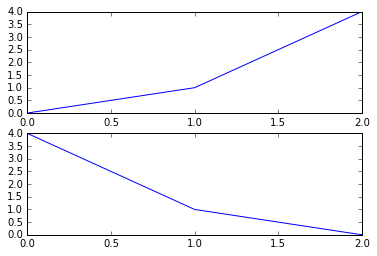

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot (211)
ax2 = fig.add_subplot (212)

ax1.plot ([0, 1, 2], [0, 1, 4])
ax2.plot ([0, 1, 2], [4, 1, 0])

In [ ]:
plt.close ("all")